In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from src.MStorch import MultiSlice, LARBED
from src.util import toCPU, toGPU, device, SimulationCell

using cuda:0
using torch.float32


In [6]:
si_pg = np.fromfile(r'test\Si\Si110_20x14x50.img', dtype=np.complex64, offset=8).reshape(-1,1024,1024)#[:,256:768,256:768]
simCell = SimulationCell(1024, 1024, 108.6000, 107.5088, 90.0000)
probe = torch.ones((1024,1024), dtype=torch.complex64, device=device)
beams = np.array([[0,0], [1,-1], [2,-2]])
larbed = LARBED(simCell, zStep=7.6792/4, nSlice=200, kV=300, nTilt=15, tiltStep=8, potential=toGPU(si_pg), tilt=(0,0), beams=beams).to(device)

vector1(red): [-28 -20]
self.vector2(blue): [-28  20]


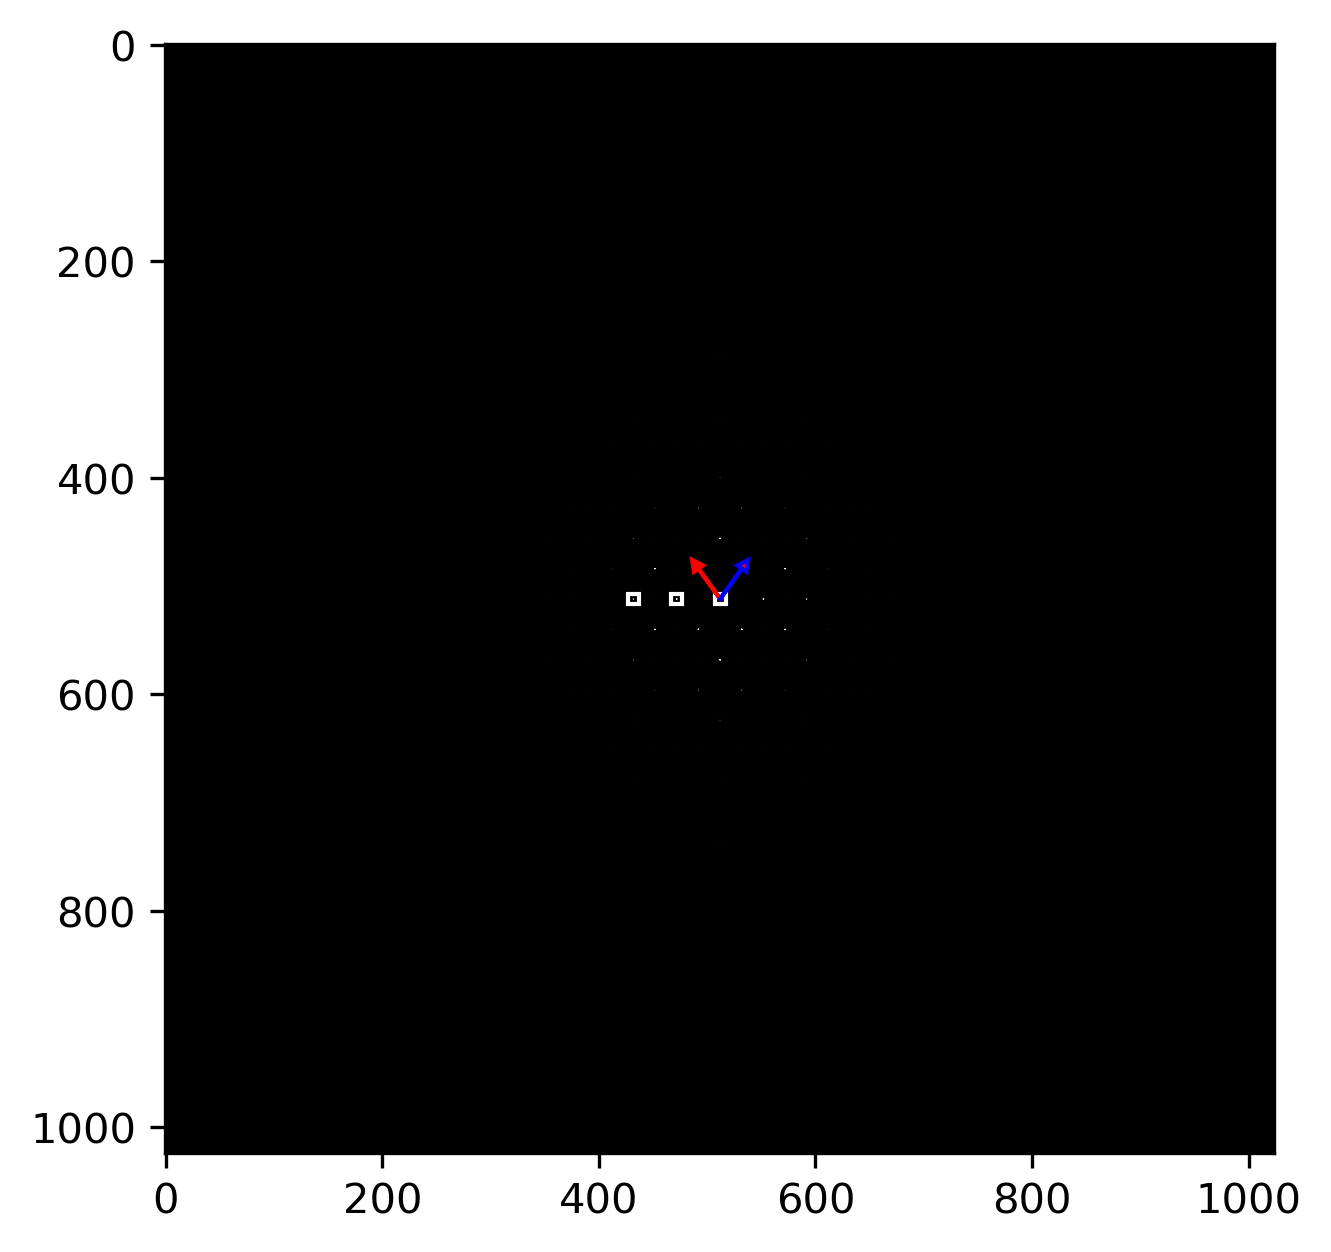

In [7]:
larbed.findLattice()
larbed.setIndices(np.array([1,-1,-1]), np.array([1,-1,1]))


In [8]:
with torch.no_grad():
    sim = larbed(probe)
sim = toCPU(sim)

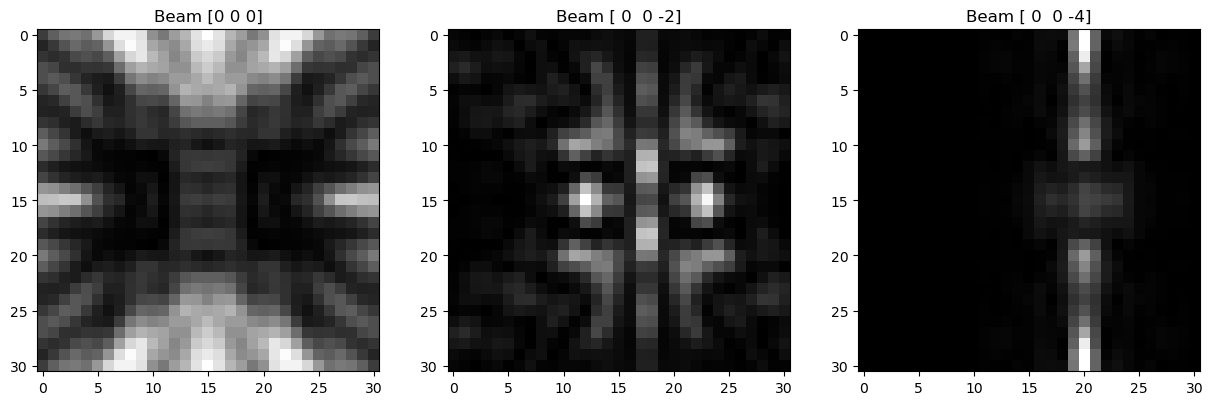

In [9]:
fig, axes = plt.subplots(1,len(beams), figsize=(5*len(beams),5))
for i, ax in enumerate(axes):
    ax.imshow(sim[i], cmap='gray')
    ax.set_title(f'Beam {larbed.indices[i]}')